# Verssion 1 of tensorflow

In [2]:
import tensorflow.compat.v1 as tf

In [3]:
tf.disable_v2_behavior() # ان هقفل السيشن بتاعت سيسنور علشان اشتغل عليه هو بس 

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
x1 = tf.constant([2],name = "tensor1")
x2 = tf.constant([5],name = "tensor2")

result = tf.multiply(x1 , x2)

result

<tf.Tensor 'Mul:0' shape=(1,) dtype=int32>

In [8]:
sess = tf.compat.v1.Session() # open the session 
print(sess.run(result))

sess.close

[10]


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x000001C7200D19A0>>

In [ ]:
using with to not using close in the end 

In [11]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1,x2)

result

with tf.compat.v1.Session() as sess:
    output = sess.run(result)
    print (output)

[ 5 12 21 32]


In [13]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

summ = tf.add(x1,x2)

sub = tf.subtract(x1,x2)

mult = tf.multiply(x1,x2)

div = tf.divide(x1,x2)

with tf.compat.v1.Session() as sass:
    print(sass.run(summ))
    print(sass.run(sub))
    print(sass.run(mult))
    print(sass.run(div))

[ 6  8 10 12]
[-4 -4 -4 -4]
[ 5 12 21 32]
[0.2        0.33333333 0.42857143 0.5       ]


In [19]:
scalar = tf.constant(2) # shape will equal zero

vector = tf.constant([5,7,9]) # shape will be 3*1

matrix = tf.constant([[5,7,0] , [2,5,1] ,[4,7,2]]) # 3*3

tensor = tf.constant ([[[5,7,0] , [2,5,1] ,[4,7,2]],[[5,7,0] , [2,5,1] ,[4,7,2]],[[5,7,0] , [2,5,1] ,[4,7,2]]]) # 3 * 3* 3

tensor

<tf.Tensor 'Const_30:0' shape=(3, 3, 3) dtype=int32>

# Verssion 2 of tensorflow

In [7]:
import tensorflow as tf 
from tensorflow.python.framework.ops import enable_eager_execution

enable_eager_execution()

tf.executing_eagerly()

True

In [4]:
x = [ 6 ]
result= tf.multiply(x,x)
result

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([36])>

In [ ]:
 i can print the number directly

In [6]:
result.numpy()[0]

36

In [9]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

summ = tf.add(x1,x2)

sub = tf.subtract(x1,x2)

mult = tf.multiply(x1,x2)

div = tf.divide(x1,x2)


print(summ.numpy())
print(sub)
print(mult)
print(div)

tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([-4 -4 -4 -4], shape=(4,), dtype=int32)
tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)
tf.Tensor([0.2        0.33333333 0.42857143 0.5       ], shape=(4,), dtype=float64)


# Linear Regression Model with tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
train_x = data["ENGINESIZE"].values
train_y = data["CO2EMISSIONS"].values
train_x.shape
train_y.shape

(1067,)

## h = w*x + b

هيحدد ال 
w random 
in every run

فهعمل train 

اعمل بيه evaluation 

 مااروحش اقفل بقي لا اعمل save to model 


لما اعمل save model it will save the result

when i save the wight it will save the train 

In [29]:
w = tf.Variable(20.0) # --> عرفنها انها فاريبل لانها هتتغير القيم بتاعتها مش هتبقي ثابته
b = tf.Variable(30.2)


def h(x):
    y = w*x + b
    return y 


In [30]:
def cost_function(y,y_pred):
    out = tf.reduce_mean(tf.square(y-y_pred))
    
    return out

## optimizer --> gradient decsent 

w_new = W_old- alpha *dervitive

In [45]:
alpha = 0.01
training_epochs = 100
loss_values =[]
b_values = []
w_values = []


for epoch in range(training_epochs):
    with tf.GradientTape() as tape: # GradientTape will loop to every epoch
        y_pred = h(train_x)
        
        loss_value = cost_function(train_y,y_pred)
        loss_values.append(loss_value)
        
        gradients = tape.gradient(loss_values,[b,w])# اعملي تفاضل مره بالنسبه للبي ومره بالنسبه لل دابيو 
        
        # print(f'b value = {b.numpy()}')# brint the wight  
        
        b.assign_sub(gradients[0] * alpha) # اعملي ابديت كل مره بالرقم الجديد الي طلعلي  b- gradiant[0] *alpha
        w.assign_sub(gradients[1] * alpha)
        
    b_values.append(b.numpy())
    w_values.append(w.numpy())


كدا انا هغير ال b and w 

علي حسب ال loss 

بمعني لو الارور عالي غيرهم 

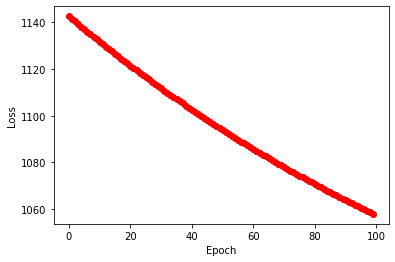

In [46]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_values,"ro")

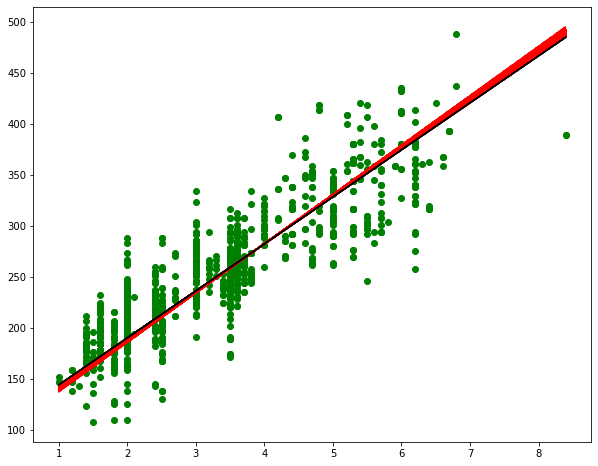

In [47]:
plt.figure(figsize = (10,8))
plt.scatter(train_x,train_y , color = "green")

for w_plot,b_plot in zip(w_values[0:len(w_values)],b_values[0:len(b_values)]):
    plt.plot(train_x,w_plot*train_x + b_plot , color = 'red' ,linestyle = 'dashed') # will drow the b value and w values when it do the update

plt.plot(train_x , w_values[-1] * train_x + b_values[-1] ,color ='black') # for the limet we put
# رسمنا كل ال لاين الي فضل يرسمها لحد ما فيي الاخر هيذهر اخر واحد الي هو -1 

رسمت كل line 

من وقت ماا كان المودل بيدرب لحد لما وصل لافضل حاجه الي هو عند  b_values[-1]

هنلاقي انهم 99 لاين احمر واخر خط وصله كان الاسود

# Regression Keras 

In [51]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
data.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [54]:
train_x =data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
train_y = data["CO2EMISSIONS"].values

In [56]:
model_Ai20 = Sequential()# يعني احط لاير لير  , layer by layer
model_Ai20.add(Dense(20,activation = 'relu',input_dim = 4))
model_Ai20.add(Dense(10,activation = 'relu'))
model_Ai20.add(Dense(1)) # 1 becouse i's regression , i can add AF or not in this step


In [57]:
model_Ai20.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_Ai20.compile(optimizer = 'adam' , loss ='mse' ,metrics = ['mse'])
history = model_Ai20.fit(train_x ,train_y ,epochs = 200,verbose =2 ,validation_split =0.1)

Epoch 1/200
30/30 [==============================] - 1s 7ms/step - loss: 25037.4688 - mse: 25037.4688 - val_loss: 13872.1846 - val_mse: 13872.1846
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 11612.6094 - mse: 11612.6094 - val_loss: 4782.8481 - val_mse: 4782.8481
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 2929.0698 - mse: 2929.0698 - val_loss: 598.0178 - val_mse: 598.0178
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 214.7145 - mse: 214.7145 - val_loss: 6.1862 - val_mse: 6.1862
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 2.1746 - mse: 2.1746 - val_loss: 0.3820 - val_mse: 0.3820
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 1.5936 - mse: 1.5936 - val_loss: 0.4980 - val_mse: 0.4980
Epoch 7/200
30/30 [==============================] - 0s 3ms/step - loss: 1.1873 - mse: 1.1873 - val_loss: 0.5866 - val_mse: 0.5866
Epoch 8/200
30/30 [====================

In [ ]:
هنا بيقلي كل خليه وصلت لفين وادربت ل ايه 

لو لقيت الفاليداشن بتاعي بيزيد تاني وعند اللوس بيقل وقتها اوقف هنا 

لان كدا هيبقي ادرب زياده عن اللزوم 
overfitting using --> early stop
